<a href="https://colab.research.google.com/github/SrimukhiT/ML_Internship/blob/main/California_HP(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Multiple Linear Regression Model***

**Import necessary libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import joblib

**Loading the dataset**

In [5]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()

Combining input features and target into a single dataframe

In [6]:
df= pd.DataFrame(housing.data,columns = housing.feature_names)
df['MedHouseValue'] = housing.target

**Inspecting the dataset**

In [7]:
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.info())
print(df.describe())

(20640, 9)
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')
MedInc           float64
HouseAge         float64
AveRooms         float64
AveBedrms        float64
Population       float64
AveOccup         float64
Latitude         float64
Longitude        float64
MedHouseValue    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes

**Data Preprocessing**

Detecting missing values

In [8]:
print(df.head())
print(df.isnull().sum())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  
MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


Checking the datatypes

In [9]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseValue,float64


Detecting outliers

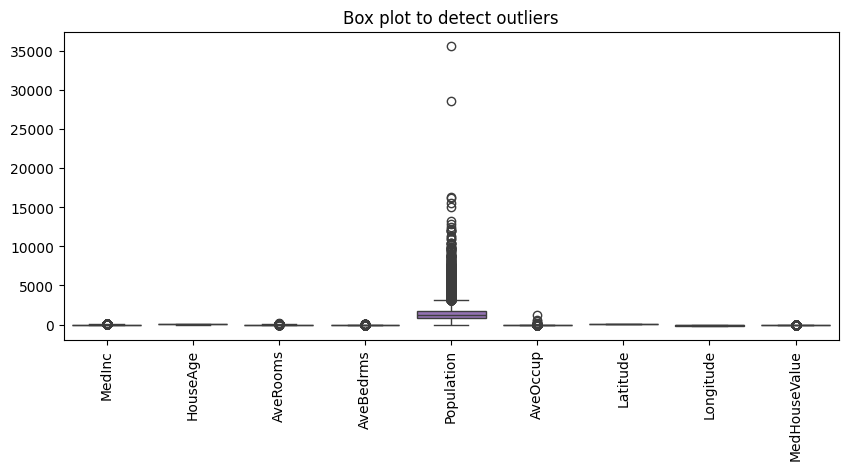

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.boxplot(data=df)
plt.xticks(rotation = 90)
plt.title('Box plot to detect outliers')
plt.show()

**Selecting Features and Target**

In [11]:
X= df.drop('MedHouseValue',axis=1)
y=df['MedHouseValue']

Handling outliers through  Standard Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_scaled = pd.DataFrame (X_scaled,columns=X.columns)

**Splitting  the dataset**

In [13]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=42)

**Train the Linear Regression Model**

In [14]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Making Predictions**

In [15]:
y_pred = model.predict(X_test)

**Evaluating the Model**

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(y_test,y_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_pred)
print(f"MSE:{mse}")       #mean squared error
print(f"RMSE:{rmse}")     #root mean squared error
print(f"R-squared:{r2}")  #R-squared score

MSE:0.5558915986952441
RMSE:0.7455813830127762
R-squared:0.575787706032451


Implementation of Random Forest Regressor

In [17]:
# Implementation of Random Forest Regressor to improve model perfromance and prediction accuracy
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,r2_score
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=mse_rf**0.5
r2_rf= r2_score(y_test,y_pred_rf)
print(f"Random Forest MSE:{mse_rf}")
print(f"Random Forest RMSE:{rmse_rf}")
print(f"Random Forest R2 : {r2_rf}")

Random Forest MSE:0.25549776668540763
Random Forest RMSE:0.5054678690929896
Random Forest R2 : 0.805024407701793


**Visualizing the Results**

Actual vs Predicted House Prices

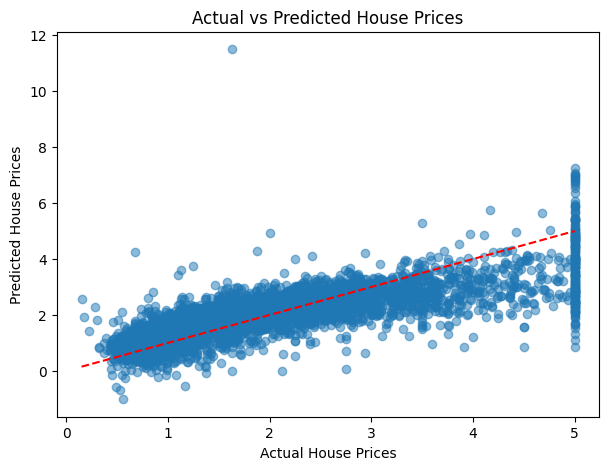

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


Residuals vs Predicted Values

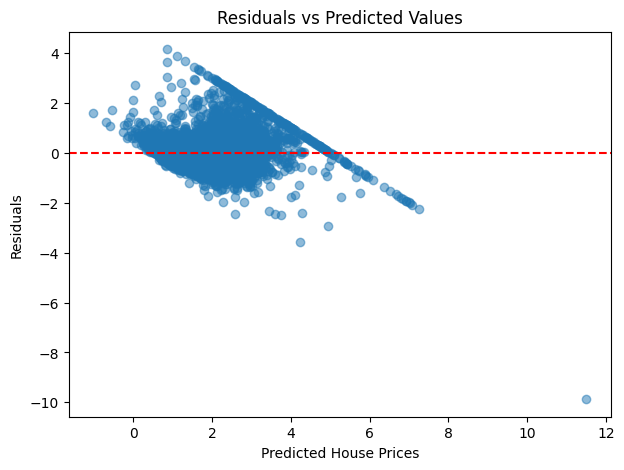

In [25]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


Distribution of Actual and Predicted Prices

<ipython-input-23-cb8d0652de7d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)
<ipython-input-23-cb8d0652de7d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)


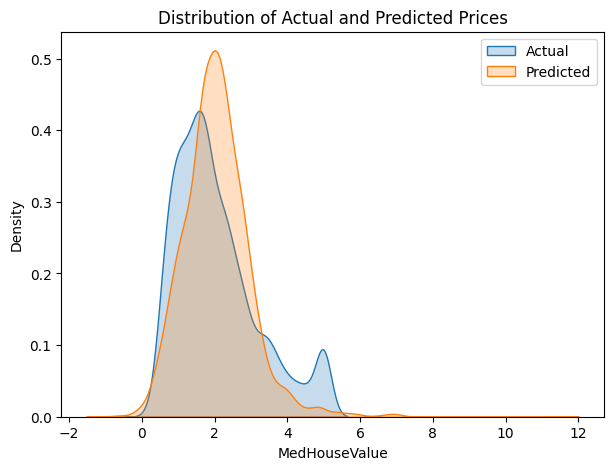

In [23]:
# Distribution Plot
plt.figure(figsize=(7,5))
sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.title('Distribution of Actual and Predicted Prices')
plt.legend()
plt.show()

**Saving the model**

In [26]:
import joblib
joblib.dump(model,'linear_regression_model.pkl')

['linear_regression_model.pkl']

Saving predictions to a CSV file

In [27]:
results= pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
results.to_csv('predicted_house_prices.csv',index=False)